# California housing prices


### The purpose of this project is to build a model of housing prices in California using the California centrus dataset (data from 1990). This dataset has metrics for each block group (district), which is the smallest geoghaphical unit for which data was published.
### The model should learn from this data and be able to predict the median housing price in any district, given all the other metrics.

### Main steps that will be covered:
1. __ Frame the problem and look at the big picture __ 
2. __ Get the data __ 
3. __ Discover and visualize the data to gain insights__ 
4. __ Prepare the data for ML algorithms__ 
5. __ Select a model and traint it__ 
6. __ Fine-tune the model__ 
7. __ Present the solution__ 
8. __ Launch, monitor, and mantain the system__ 


## 1. Frame the problem and look at the big picture

###    1. 1 Define the objective in business terms:
__The output of the model will be used as input for another ML system, along with other signals. The downstream system will determine wether it is worth investing in a given area or not. __

###     1. 2 What are the current solutions (if any)?
__The district housing prices are estimated manually by experts. The process is expensive and time consuming, and the estimates are not great (off by more than 10%).__


### 1. 3 How should you frame the problem (supervised/unsupervised, batch/online etc)?
__This problem can be solved with a supervised learning algorithm as the data is labeled. Moreover, the algorithm can be a multivariate regression since we are asked to make a prediction. As it is not required to rapidly adapt the algorithm to new changes, batch learning can be used.__

### 1. 4 How the performance should be measured?
__We can use RMSE(Root Mean Squared Error aka l2 norm), with a higher weight for large errors. __






In [1]:
from IPython.display import Math
Math(r'RMSE(X, h) = \sqrt{\frac1m \sum_{i=1}^m (h(x^{(i)}) - y^{(i)})^{2}}')

### 1. 4 Check the assumptions

## 2. Get the data

### 2.1 Download the data

In [2]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_ARCHIVE = "housing.tgz"
HOUSING_URL = os.path.join(DOWNLOAD_ROOT, "datasets/housing/", HOUSING_ARCHIVE)

HOUSING_SAVE_PATH = os.path.join("datasets", "housing")

def fetch_data(data_url=HOUSING_URL, save_path=HOUSING_SAVE_PATH, file_name=HOUSING_ARCHIVE):
    if not os.path.isdir(save_path):
        os.makedirs(save_path)
    
    file_path = os.path.join(save_path, file_name)
    urllib.request.urlretrieve(data_url, file_path)    
    archived_data = tarfile.open(file_path)
    archived_data.extractall(path=save_path)
    archived_data.close()
    
    

In [3]:
fetch_data()

In [4]:
import pandas as pd

HOUSING_DATA = "housing.csv"

def load_data(path=HOUSING_SAVE_PATH, file_name=HOUSING_DATA):
    complete_path=os.path.join(path, file_name)
    return pd.read_csv(complete_path)

data = load_data()

### 2.2 Take a quick look at the data


In [5]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#### Note that the dataset has 20640 entries (fairly small dataset), the "total_bedrooms" attribute has only 20433 non-null values, and that the ocean_proximity attribute is not a numerical one

In [7]:
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


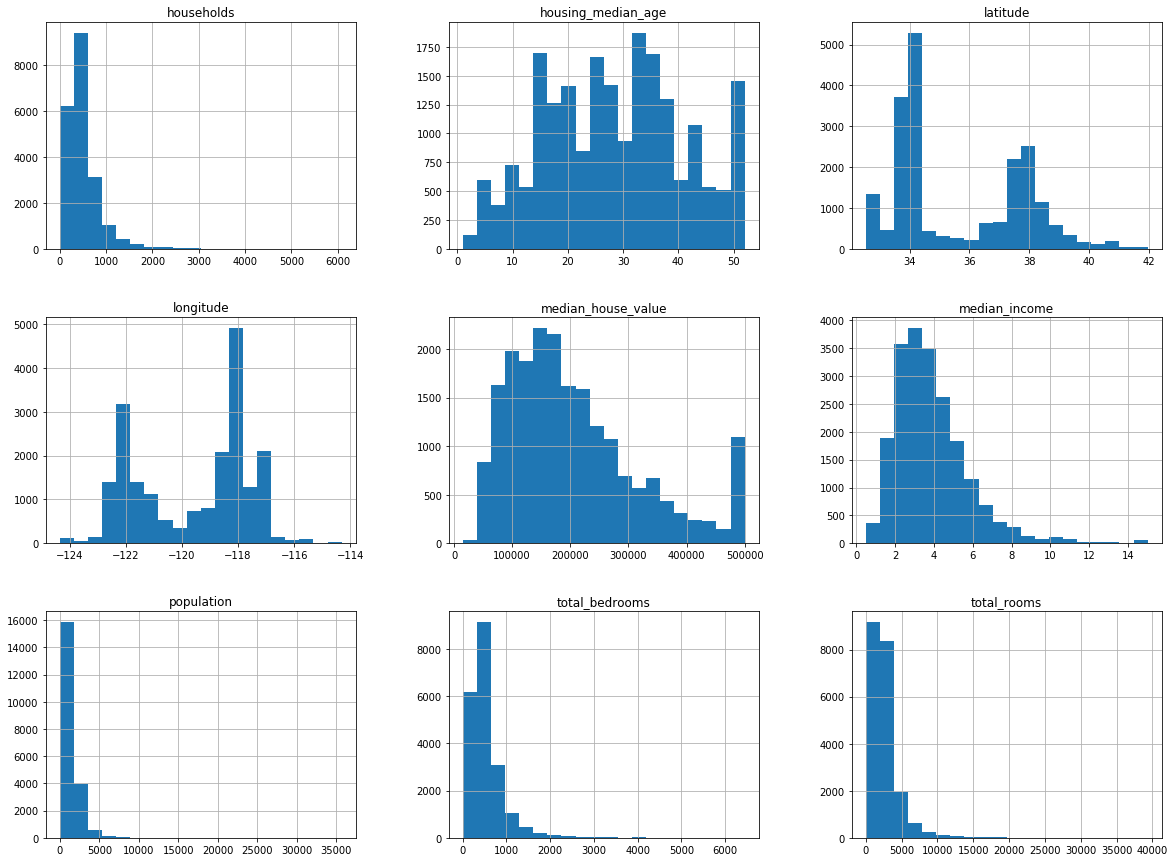

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt

data.hist(bins=20, figsize=(20, 15))
plt.show()


#### Note that: 
__1. The median income attribute does not look like it is expressed in US dollars. After checking with the team that collected the data, you find that the data has been scaled and capped at 15 for higher median incomes, and at 0.5 for lower median incomes.__
<br>
__2. The housing median age and the median house value were also capped. As the later one is the target attribute, the algorithm may learn that the prices never go beyond that limit. If this is a problem for the final result, there are mainly two options: collect proper labels for the capped data or remove those observations__
<br>
__3. The attributes have very different scales__
<br>
__4. Many histograms are tail heavy. This may make it a bit harder for some ML algorithms to detect patterns.__

### 2.2 Create a test set

#### Purely random sampling methods are generally fine if the dataset is large enough, but if not, there is a risk of introducing a sampling bias. To avoid this, we will use a stradified sampling (divide in homogeneous subgroups).
__Supose the experts suggested that the median income is a very important attribute to predict the median housing prices. We want to make sure that the test set is representative of the various categories of incomes in the whole dataset.__

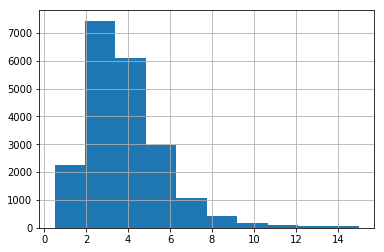

In [10]:
data['median_income'].hist()

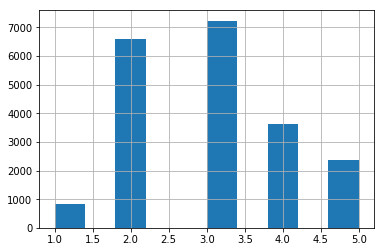

In [11]:
import numpy as np

# divide by 1.5 to limit the number of income categories
data['income_category']= np.ceil(data['median_income']/1.5)

# label what is above five as five
data['income_category'].where(data['income_category'] < 5, 5.0, inplace=True)
data['income_category'].hist()


In [12]:
data["income_category"].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_category, dtype: int64

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(data, data['income_category']):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [14]:
# check the size
strat_train_set['income_category'].value_counts() / len(strat_train_set)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_category, dtype: float64

In [15]:
strat_test_set['income_category'].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_category, dtype: float64

In [16]:
# get the data back to its original state

for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_category', axis=1, inplace=True)
    

## 3. Discover and visualize the data to gain insights

In [17]:
# use a copy of the train set to avoid harming the original data
train_set_copy = strat_train_set.copy()

### 3.1 Visualizing geographical data

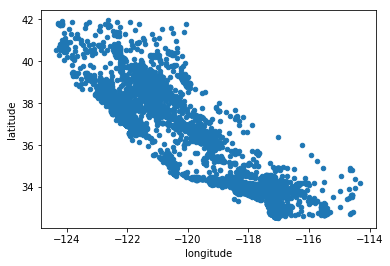

In [18]:
train_set_copy.plot(kind='scatter', x='longitude', y='latitude')

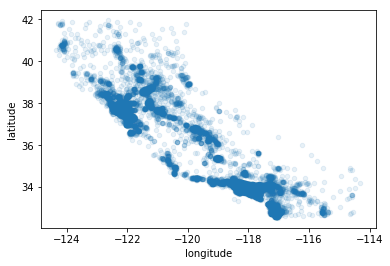

In [19]:
# add alpha paramter to make easier the visualtions of high density points
train_set_copy.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

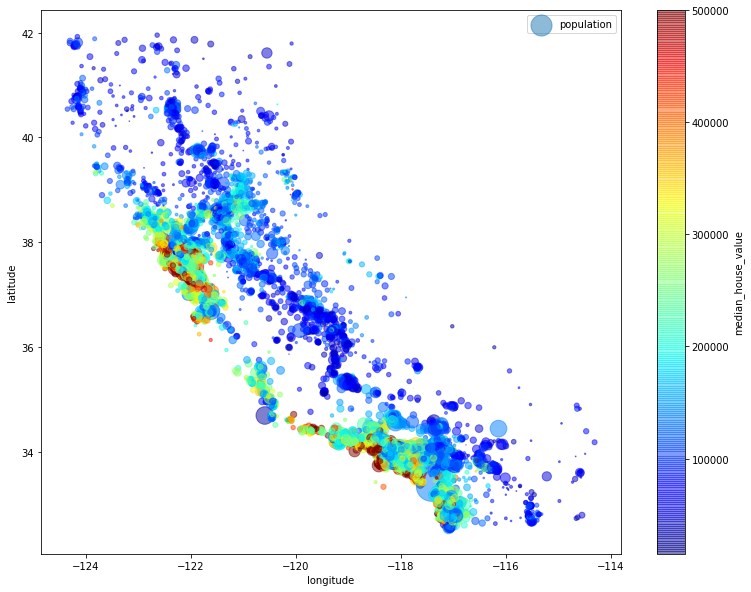

In [20]:
# s parameter will represent the population as the radius
# c parameter will represent the price

train_set_copy.plot(kind='scatter', x='longitude', y='latitude', alpha=0.5, 
                    s=train_set_copy['population']/40, label='population', figsize=(13,10),
                   c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True, sharex=False)

plt.legend()

#### Note that his graphs shows that the prices are very much related to the location (close to the ocean), and the population density.
__It may be useful to use a clustering algorithm to detect the main clusters and add a new feature that represents the distance from the center of the cluster.__


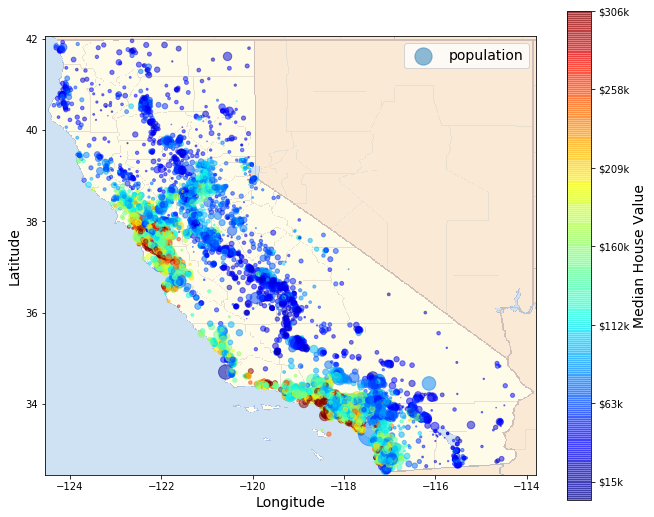

In [21]:
import matplotlib.image as mpimg
california_img=mpimg.imread('./images/california.png')

ax = train_set_copy.plot(kind='scatter', x='longitude', y='latitude', alpha=0.5, 
                    s=train_set_copy['population']/60, label='population', figsize=(11,9),
                    c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=False, sharex=False)

plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))

plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = train_set_copy["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=10)
cbar.set_label('Median House Value', fontsize=14)

plt.legend(fontsize=14)
plt.show()


### 3.2 Looking for correlations


__Since the dataset is not too large, we can easly compute the standard correlation coefficient between every pair of attributes.__

In [22]:
correlation_matrix = train_set_copy.corr()
print(correlation_matrix)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924478           -0.105848     0.048871   
latitude            -0.924478  1.000000            0.005766    -0.039184   
housing_median_age  -0.105848  0.005766            1.000000    -0.364509   
total_rooms          0.048871 -0.039184           -0.364509     1.000000   
total_bedrooms       0.076598 -0.072419           -0.325047     0.929379   
population           0.108030 -0.115222           -0.298710     0.855109   
households           0.063070 -0.077647           -0.306428     0.918392   
median_income       -0.019583 -0.075205           -0.111360     0.200087   
median_house_value  -0.047432 -0.142724            0.114110     0.135097   

                    total_bedrooms  population  households  median_income  \
longitude                 0.076598    0.108030    0.063070      -0.019583   
latitude                 -0.072419   -0.115222   -0.077647      -0.075205   
housing_

In [23]:
correlation_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000198C1380B38>,
      dtype=object)

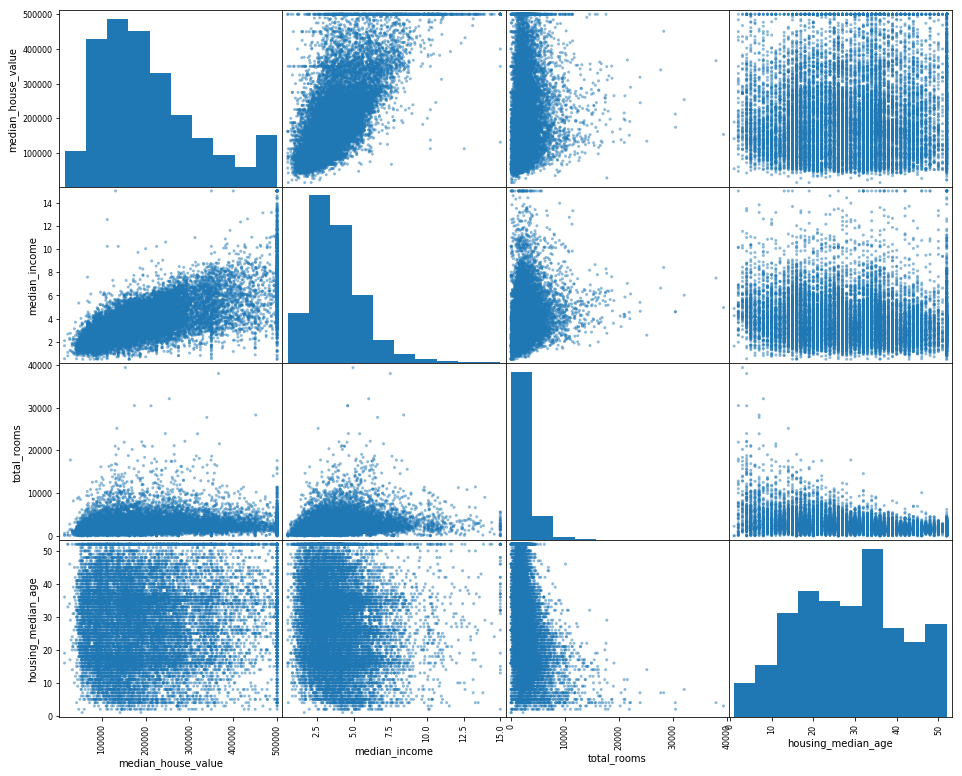

In [24]:
from pandas.plotting import scatter_matrix
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(train_set_copy[attributes], figsize=(16, 13))

__The most relevant attribute to predict the median house value is the median income.__

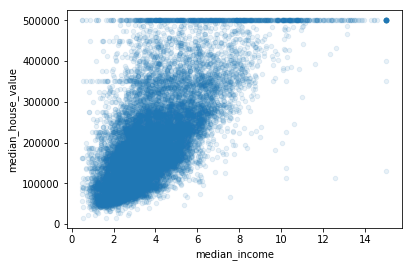

In [25]:
train_set_copy.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)

#### Note that:
__1. There is a strong correlation between this two attributes.__
<br>
__2. The previosly mentioned cap is obvious as a horizontal line at 500000.__
<br>
__3. This graph reveals other less obvious straight lines: a horizontal line at 350000, another one at 450000, perhaps another at 280000. The algorithm may learn to reproduce this data quirks, so trying to remove the corresponding districts may help.__

### 3.3 Experimenting with attribute combination

__We can use attribute combinations to gain new insights. For example, the number of rooms in a district is not very useful without the number of households. Also, the number of bedrooms should be compared with the number of rooms and the population with the number of households. __

In [26]:
train_set_copy['rooms_per_house_hold'] = train_set_copy['total_rooms']/train_set_copy['households']
train_set_copy['bedrooms_per_room'] = train_set_copy['total_bedrooms']/train_set_copy['total_rooms']
train_set_copy['population_per_household']=train_set_copy['population']/train_set_copy['households'] 

In [27]:
correlation_matrix = train_set_copy.corr()
correlation_matrix ['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_house_hold        0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

__The bedroom_per_room attribute is more correlated with the median house value than the total number of rooms or bedrooms. Apparently, houses with lower bedroom/rooms ratio tend to be more expensive. The number of rooms per household is also more relevant, obviously the larger the house is, the more expensive it gets__

### 3.4 Data cleaning

__Separte the predictors and the labels__

In [28]:
# the drop function makes the change in the copy that is returned
train_set = strat_train_set.drop("median_house_value", axis=1)
train_set_labels = strat_train_set["median_house_value"].copy()

__We noticed that the total_bedrooms attribute had some missing values.__

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
income_category       20640 non-null float64
dtypes: float64(10), object(1)
memory usage: 1.7+ MB


__In this case, we could drop the corresponding districts, the whole attribute, or set the missing values to some generated ones. Because the dataset is small, we will set this missing values to the median value.__

__If we will compute the median value on the training set, and use it to fill the missing values from the training set, we should also use this value to replace the missing values from the test set, and also use it when the system goes live to replace the missing values in the new data.__

__To make things easier, Scikit-Learn provides a handy class to take care of the missing values__

In [30]:
from  sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

#since the imputer works only on numerical data, we will use a copy of the dataset without the ocean_proximity attribute
numerical_copy=train_set.drop('ocean_proximity', axis=1)
imputer.fit(numerical_copy)


SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [31]:
#after the fit functions was called, the imputer has computed the median of each attribute
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

__Only the total_bedrooms had missing values, but we cannot be sure that it won't be missing values in the new data, so it is safe to use the imputer on all the numerical attributes. Now we can use this "trained" imputer to transform the training set with the new learned values.__

In [32]:
#the result is a numpy array
transformed_numerical_dataset = imputer.transform(numerical_copy)

__Note that sometimes, the fit_transform functions is optimized and runs much faster__

__As most of the ML algorithms prefer to work with numeric values, we will take care of the categorical attributes__

In [33]:
categorical_copy = train_set[['ocean_proximity']]
categorical_copy.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [34]:
from sklearn.preprocessing import OneHotEncoder

oneHotEncoder = OneHotEncoder()
transformed_categorical_dataset = oneHotEncoder.fit_transform(categorical_copy)
# a sparse matrix is returned
transformed_categorical_dataset

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [35]:
#transform to a dense matrix to visualize
transformed_categorical_dataset.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [36]:
oneHotEncoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

__Custom transformers __

__Even though Scikit-Learn provides many useful transformers, we need to write our own for custom  tasks. The transformer has to work seamlessly with Scikit-Learn__

In [37]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_index, bedrooms_index, population_index, household_index =[
    list(train_set_copy).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")
]

# to make the transformer work seamleassly with Scikit-Learn we need to implement fit, transform, and fit_transform
# using TransformerMixin as base class will add fit_transform 
# using BaseEstimator as a base class we will have get_params and set_params, useful for automatic hyperparameter tuning
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        # we have nothing to do in the fit function
        return self 
    def transform(self, X, y=None):
        rooms_per_household = X[:,rooms_index] / X[:,household_index] 
        population_per_household = X[:,population_index] / X[:,household_index]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_index] / X[:,rooms_index]
            return np.c_[X, rooms_per_household, population_per_household,
                        bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [38]:
attribute_adder = CombinedAttributesAdder(add_bedrooms_per_room = False)
train_set_copy = strat_train_set.copy()
# train_set_copy.values will return a numpy array
extra_attributes_dataset = attribute_adder.transform(train_set_copy.values)

In [39]:
extra_attributes_dataset = pd.DataFrame(extra_attributes_dataset,
                                       columns = list(train_set_copy.columns) + 
                                        ["rooms_per_household", "population_per_household"])
extra_attributes_dataset.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,population_per_household
0,-121.89,37.29,38,1568,351,710,339,2.7042,286600,<1H OCEAN,4.62537,2.0944
1,-121.93,37.05,14,679,108,306,113,6.4214,340600,<1H OCEAN,6.00885,2.70796
2,-117.2,32.77,31,1952,471,936,462,2.8621,196900,NEAR OCEAN,4.22511,2.02597
3,-119.61,36.31,25,1847,371,1460,353,1.8839,46300,INLAND,5.23229,4.13598
4,-118.59,34.23,17,6592,1525,4459,1463,3.0347,254500,<1H OCEAN,4.50581,3.04785
5,-120.97,37.66,24,2930,588,1448,570,3.5395,127900,INLAND,5.14035,2.54035
6,-118.5,34.04,52,2233,317,769,277,8.3839,500001,<1H OCEAN,8.06137,2.77617
7,-117.24,34.15,26,2041,293,936,375,6,140200,INLAND,5.44267,2.496
8,-118.26,33.99,47,1865,465,1916,438,1.8242,95000,<1H OCEAN,4.25799,4.37443
9,-118.28,34.02,29,515,229,2690,217,0.4999,500001,<1H OCEAN,2.37327,12.3963


__Feature scaling__

__As generally ML algorithms don't perform well on numerical attributes that have very different scales, we will need feature scaling.(Scaling the target values is not generally required)__

__There are two common ways to get the attributes to the same scale:__
<br>
__1. Normalization: Values are rescaled to have a range from 0 to 1. Sensible to outliers.__
<br>
__2. Standardization: The values have 0 mean, and the resulting distribution has unit variance. Standardization does not bound the values to a specific range. Much less affected by outliers__

In [40]:
# for standardization we will use StandardScaler
from sklearn.preprocessing import StandardScaler

__As with all the transformations, it is important to fit the scalers to the training data only, not the full dataset. Only then the transformation should be made on the training and test set.__

__But because there are many transformation steps that need to be executed in the right order, we will use a transformation pipeline__

__Transformation Pipelines__

__Scikit-Learn provides the Pipeline class to help such sequences of transformations.__

In [41]:
from sklearn.pipeline import Pipeline

# a pipeline only for numerical attributes
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

numerical_transformed_dataset = numerical_pipeline.fit_transform(numerical_copy)

In [42]:
numerical_transformed_dataset

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [43]:
from sklearn.compose import ColumnTransformer

numerical_attributes = list(numerical_copy)
categorical_attributes = ['ocean_proximity']

# add the categorical attributes
complete_pipeline = ColumnTransformer([
    ('num', numerical_pipeline, numerical_attributes),
    ('cat', OneHotEncoder(), categorical_attributes)
])

train_set_copy = strat_train_set.copy()
prepared_train_set = complete_pipeline.fit_transform(train_set_copy)

prepared_train_set

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [44]:
prepared_train_set.shape

(16512, 16)

## 4. Select and train a model

__We can start trying with a Linear Regression model to see what happens.__

In [45]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(prepared_train_set, train_set_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

__Let's measure this regression model's RMSE on the training set.__

In [46]:
from sklearn.metrics import mean_squared_error
train_set_predictions = linear_regression.predict(prepared_train_set)
lin_mse =  mean_squared_error(train_set_labels, train_set_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

__median_housing_values range from 120.000 and 265.000, so 68,628 is not a great result. This is an example of a model underfitting the training data. This can be caused by a model that is not powerful enough, or features that do not provide enough information to make good predictions. __
<br>
__We could choose a more powerful model, feed the training algorithm with better features, or reduce the constraints on the model.__

__Let's train a DecisionTreeRegressor, a powerful model, capable of finding complex nonlinear relationships in the data.__

In [47]:
from sklearn.tree import DecisionTreeRegressor

# train the model
decisionTreeRegressor = DecisionTreeRegressor()
decisionTreeRegressor.fit(prepared_train_set, train_set_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [48]:
# test the model
tree_train_set_predictions = decisionTreeRegressor.predict(prepared_train_set)
tree_mse = mean_squared_error(train_set_labels, tree_train_set_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

__This looks like the model has seriously overfit the data.__

__Better evaluation using Cross-Validation__

__One way to evaluate the model, would be to split the current train set into a smaller training set and a validation set.__
<br>
__A better way would be to perform a K-Fold cross-validation using Scikit-Learn's cross validation.__

In [49]:
from sklearn.model_selection import cross_val_score
import sklearn

# cross-validation features expect a utility function (greater is better) rather than a cost function (lower is better)
scores = cross_val_score(decisionTreeRegressor, prepared_train_set, train_set_labels,
                        scoring='neg_mean_squared_error', cv=10)
rmse_scores = np.sqrt(-scores)

In [50]:
def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    # we can use the standard deviation as a measure of how precise the estime is 
    print('Standard deviation:', scores.std())

In [51]:
display_scores(rmse_scores)

Scores: [69708.80427016 67285.07283879 70661.29615962 69290.81591552
 70012.74696033 74574.8220627  70527.35919624 70824.95528598
 76190.82495649 70180.75317417]
Mean: 70925.74508200011
Standard deviation: 2450.9721181540626


__Now, it looks like the model performs even worse than the Linear Regression model. The score is approximatelly 71.400, with a standard deviation of plus or minus 2300.__ 

__Let's evaluate also the Linear Regression model.__

In [52]:
lg_mse_scores = cross_val_score(linear_regression, prepared_train_set, train_set_labels,
                        scoring='neg_mean_squared_error', cv=10)
lg_rmse_scores= np.sqrt(-lg_mse_scores)

In [53]:
display_scores(lg_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.6740017983425


__The decision tree is overfitting so badly that it performs worse than the Linear Regression model.__

__Let's try one more model: RandomForestRegressor.__
<br>
<br>
__A Random Forest works by traing many Decision Trees on random subsets of the features, then averagint out the predictions. Building a model on top of many other models is called Ensemble Learning, and it is often a great way to push ML algorithms even futher.__

In [66]:
from sklearn.ensemble import RandomForestRegressor

randomForestRegressor = RandomForestRegressor(n_estimators=10, random_state=42)
randomForestRegressor.fit(prepared_train_set, train_set_labels)
rfg_predictions = randomForestRegressor.predict(prepared_train_set)

rfg_mse = mean_squared_error(train_set_labels, rfg_predictions)
rfg_rmse = np.sqrt(rfg_mse)
rfg_rmse

21933.31414779769

In [67]:
mse_rfg_scores = cross_val_score(randomForestRegressor, prepared_train_set, train_set_labels,
                                scoring="neg_mean_squared_error", cv=10)
rmse_rfg_scores = np.sqrt(-mse_rfg_scores)

In [68]:
display_scores(rmse_rfg_scores)

Scores: [51646.44545909 48940.60114882 53050.86323649 54408.98730149
 50922.14870785 56482.50703987 51864.52025526 49760.85037653
 55434.21627933 53326.10093303]
Mean: 52583.72407377466
Standard deviation: 2298.353351147122


In [54]:
#todo: add aditional doc steps 
# You also noticed that some attributes have a tail-heavy distribution, so you may want to transform them (e.g., by computing their logarithm).